In [1]:
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.gridspec as gridspec
from scipy.cluster import hierarchy

mpl.style.use('seaborn')
%matplotlib inline

### Criterios del registro
    @MafeCarrascal
    @CathyJuvinao
    @FabianSanabriaS
    @DanielSamperO
    @ClaudiaLopez
    @AngelicaLozanoC
    @AntanasMockus
    @ArielAnaliza
    @datoatipico
    @Rivas_Santiago
    @Uriasv
    @cielo_rusinque
    @MeDicenWally
    @intiasprilla
    @navarrowolff
    @angelamrobledo
    @DavidRacero
    @MirandaBogota
    @MauroToroO
    @conycamelo
    @eljulisastoque
    @JULIOC_HERRERA
    @AlvaroUribeVel
    @MariaFdaCabal
    @natiibedoya
    @CatalinaSuarezB
    @MiguelPoloP

# Loader


In [2]:
#get users and mentions from the download files:
tweets_datas_path = ["cuentas_tweets_0.json","cuentas_tweets_1.json"]
tw_id=[]
tw_user_id=[]
tw_user=[]
# tw_text=[]
entities_long=[]
mentioned_ids=[]
tw_device=[]# print(twits[rnd_ind]["source"])
tw_date=[]# print(twits[rnd_ind]["created_at"])


for json_file in tweets_datas_path:
    with open(json_file, "r") as tweets_file:
        for line in tweets_file:
            try:
                tweet = json.loads(line)
                tw_entities=[]
                tw_entities.extend(tweet["entities"]["user_mentions"])
                entities_long.extend(tweet["entities"]["user_mentions"])
                tw_text_loop=[tweet["text"]]
#                 if tweet["truncated"]:#=="True": # Truncated indica si el tweet es corto o largo; si truncado, busca extendido
#                     tw_text_loop=[tweet["extended_tweet"]["full_text"]]
#                     tw_entities.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
#                     entities_long.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
#                 else:
#                     if tweet["text"][0:2]=="RT":
#                         if tweet["retweeted_status"]["truncated"]:
#                             tw_text_loop=[tweet["retweeted_status"]["extended_tweet"]["full_text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
#                             entities_long.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
#                         else: 
#                             tw_text_loop=[tweet["retweeted_status"]["text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["entities"]["user_mentions"])
#                         if tweet["retweeted_status"]["is_quote_status"]:
#                             tw_text_loop=[tweet["extended_tweet"]["full_text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
#                             entities_long.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
#                     else:
#                         tw_text_loop=[tweet["text"]]
                tw_id.append(tweet["id_str"])
                tw_user_id.append(tweet["user"]["id_str"])
                tw_user.append(tweet["user"]["screen_name"])
                mentioned_ids.append([tweet["id_str"],tweet["user"]["id_str"],list(set([ent["id_str"] for ent in tw_entities]))])
#                 tw_text.append([tweet["id_str"],tw_text_loop])
                tw_device.append(tweet["source"])
                tw_date.append(tweet["created_at"])
            except:
                continue

In [3]:
print("Tweets identificados con código     :",len(tw_id),"\n",
      "Tweets con usuario identificado     :",len(tw_user_id),"\n",
      "Tweets con nombre de usuario        :",len(tw_user),"\n",
#       "Textos de tweets recuperados        :",len(tw_text),"\n",
      "Total de Menciones en los tweets    :",len(entities_long),"\n",
      "Tweets con menciones identificadas  :",len(mentioned_ids),"\n",
      "Tweets con dispositivos registrado  :",len(tw_device),"\n",
      "Tweets con fechas registradas       :",len(tw_date),"\n"
     )

Tweets identificados con código     : 418780 
 Tweets con usuario identificado     : 418780 
 Tweets con nombre de usuario        : 418780 
 Total de Menciones en los tweets    : 1161176 
 Tweets con menciones identificadas  : 418780 
 Tweets con dispositivos registrado  : 418780 
 Tweets con fechas registradas       : 418780 



In [4]:
tweets_ids=pd.DataFrame({"tw_user_id":tw_user_id,"tw_user":tw_user}, index=tw_id)
ids_freqs=pd.crosstab(index=tweets_ids.tw_user, columns="count")
ids_freqs=ids_freqs.sort_values(by=['count'] , ascending=False)["count"]
print("twiteros:",ids_freqs.shape[0])

twiteros: 71072


row_0
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    267254
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>       81764
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       35180
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                  28043
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>         4966
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>        385
<a href="https://twitter.com/indirectasrock" rel="nofollow">CabronaGold-2</a>              269
<a href="http://www.twitter.com/noviosicopata" rel="nofollow">CabronaGold-2a</a>           260
<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M2)</a>                    186
<a href="http://www.tweetcaster.com" rel="nofollow">TweetCaster for Android</a>             55
<a href="https://twitterrific.com/ios" rel="

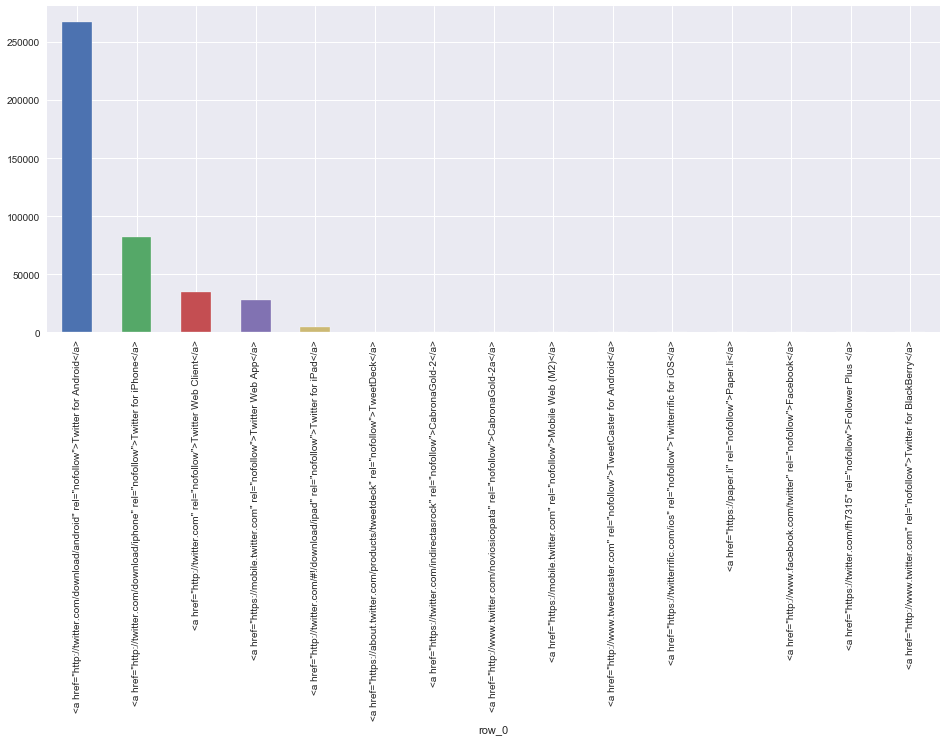

In [5]:
devices=pd.crosstab(index=np.array(tw_device), columns="count")
devices=devices.sort_values(by=['count'] , ascending=False)["count"]
devices[:15].plot(figsize=(16, 6), kind="bar")
devices[:15]

C:\Users\Alexis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


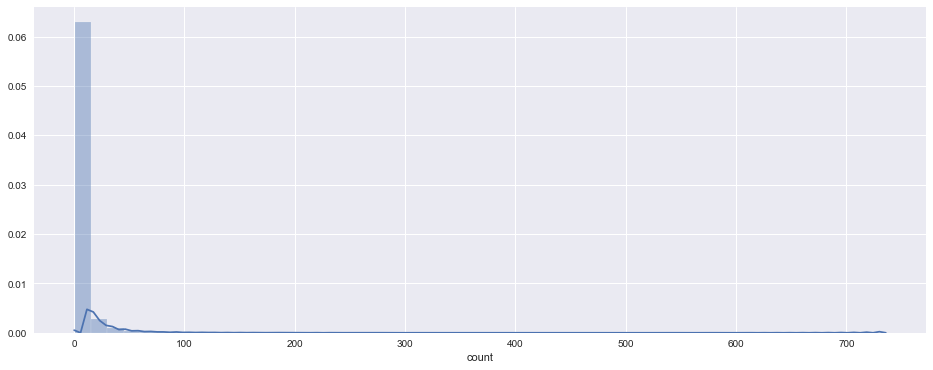

In [6]:
plt.figure(figsize=(16,6))
sns.distplot(ids_freqs)

In [7]:
round(ids_freqs.describe(),3)

count    71072.000
mean         5.892
std         17.621
min          1.000
25%          1.000
50%          2.000
75%          4.000
max        735.000
Name: count, dtype: float64

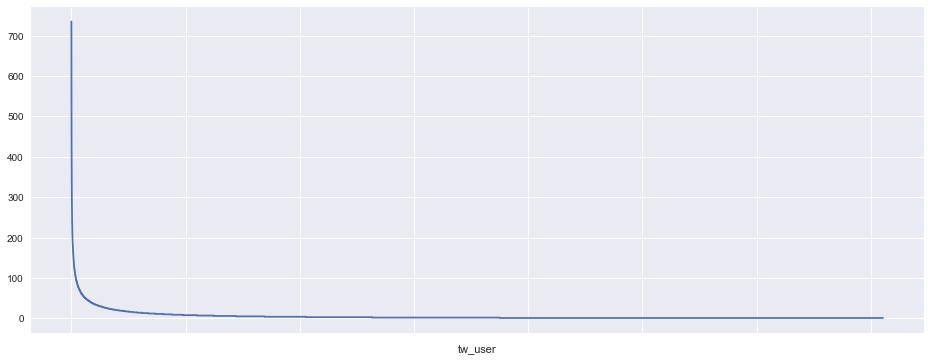

In [8]:
ids_freqs.plot(figsize=(16, 6))

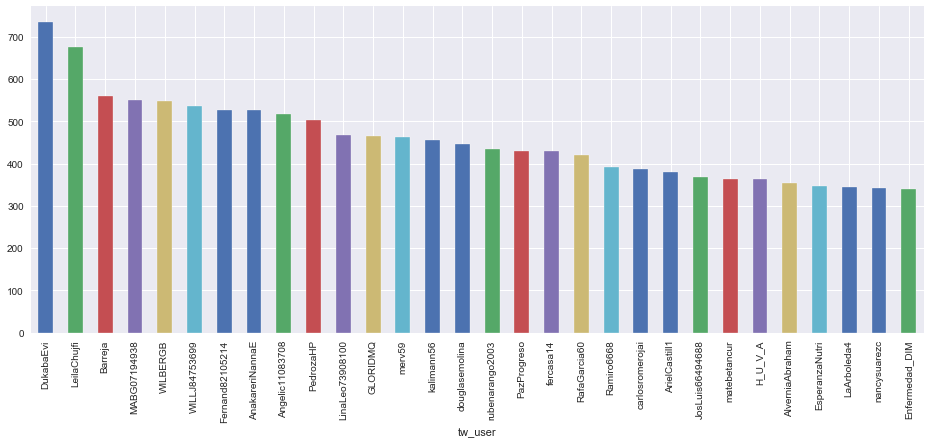

In [9]:
ids_freqs[:30].plot(figsize=(16, 6), kind="bar")
plt.savefig('top_tweeters.png')

In [10]:
ids_freqs.sort_values(ascending=False)[:60]

tw_user
DukabaEvi          735
LeilaChujfi        675
Barreja            560
MABG07194938       550
WILBERGB           547
WILLJ84753699      537
Fernand82105214    526
AnakareriNannaE    526
Angelic11083708    518
PedrozaHP          503
LinaLeo73908100    467
GLORIDMQ           465
merv59             463
kalimann56         455
douglasemolina     446
rubenarango2003    435
PazProgreso        430
fercasa14          429
RafaGarcia60       420
Ramiro6668         391
carlosromerojai    388
ArielCastill1      380
JosLuis66494688    367
H_U_V_A            364
matebetancur       364
AlverniaAbraham    354
EsperanzaNutri     347
LaArboleda4        345
nancysuarezc       342
Enfermedad_DIM     340
mareba82           332
jhony_figueroa1    331
ernesto1972m6      323
Colombia_y_yo      316
Helenpomar         311
LuisEdu620829      307
celso_castilla     307
dresCaicedo        303
nos_verdad         301
Camava3            298
rafistan73         293
wilromerol         289
alejopereira27     286
Mir

In [11]:
uniq_ids=list(set([entit["id_str"]for entit in entities_long]))
len(uniq_ids)

27351

In [12]:
ments_df=pd.DataFrame([[entit["id_str"],
                        entit["screen_name"],
                        entit["name"]
                       ]for entit in entities_long],
                     columns=["id_str","screen_name","name"])

In [13]:
ments_freq=pd.crosstab(index=ments_df.screen_name, columns="count")
ments_freq=ments_freq.sort_values(by=['count'] , ascending=False)
print("Cuentas mencionadas",ments_freq.shape[0])

Cuentas mencionadas 27412


# Clustering Nexos¶


In [14]:
# Tabla de ocurrencia de menciones por tuit
id_ments=pd.crosstab(np.array([tw_mnt for tw_mntns in mentioned_ids for tw_mnt in tw_mntns[2] ]), columns="count").sort_values(ascending=False, by="count")

In [15]:
top_n=300

In [16]:
ments_ids_top=list(id_ments.index[:top_n])

In [17]:
mntns_top_ocurr=np.array([[cand in tw_mntns[2] for cand in ments_ids_top]for tw_mntns in mentioned_ids])

In [18]:
mntns_top_ocurr.shape

(418780, 300)

In [19]:
names_mnts_top=[]
for usr_id in id_ments.index[:top_n]:
    name=""
    try:
        name=ments_df[ments_df.id_str==usr_id].screen_name.iloc[0]
    except:
        name="Unknown"
#     print(usr_id, name)
    names_mnts_top.append(name)
        
#     print(usr_id,tweets_ids[tweets_ids.tw_user_id==usr_id].tw_user.iloc[0])

In [20]:
# twtxt_ids=[txt_id[0] for txt_id in tw_text] # Id del tuit con el texto
df_mntns_top_ocurr=pd.DataFrame(mntns_top_ocurr,columns=names_mnts_top, index=tw_id)

DanielSamperO      48022
ClaudiaLopez       43949
MafeCarrascal      42420
Uriasv             37578
petrogustavo       21625
natiibedoya        21209
navarrowolff       21110
IvanDuque          19146
angelamrobledo     15323
MariaFdaCabal      12177
VickyDavilaH       11877
CathyJuvinao       11366
DavidRacero        10886
AngelicaLozanoC    10026
matadoreltiempo     9515
Rivas_Santiago      8522
AlvaroUribeVel      8367
DELAESPRIELLAE      8161
NanyPardo           7775
GarciaColorad0      6030
dtype: int64


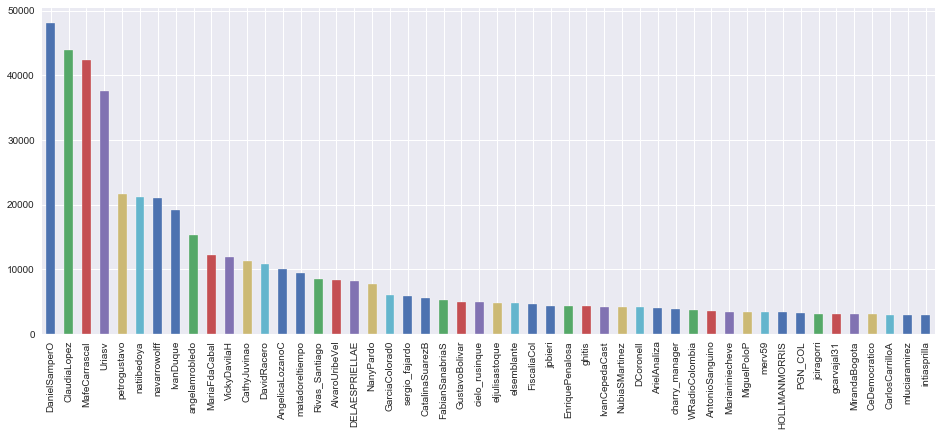

In [21]:
plt.figure(figsize=(16,6))
print (df_mntns_top_ocurr.sum(axis=0).sort_values(ascending=False)[:20])
df_mntns_top_ocurr.sum(axis=0).sort_values(ascending=False)[:50].plot(kind="bar")
plt.savefig('top_mentions.png')

In [22]:
# mntns_ward= hierarchy.linkage(df_mntns_top_ocurr.transpose(), 'ward')

In [23]:
# #max_d = 10
# plt.figure(figsize=(10,100))
# #plt.figure()
# dn = hierarchy.dendrogram(mntns_ward,orientation="left", labels=names_mnts_top)
# #plt.axhline(y=max_d, c='k')
# plt.title('Ward Link Dendrogram por tweets')
# plt.yticks(fontsize=16)
# plt.savefig('dendrograma_ward_link_mentions.png')
# plt.show()

# Relaciones de cuentas

In [24]:
directed_graph_df=df_mntns_top_ocurr.groupby(tw_user).aggregate(sum)

In [25]:
mntns_ward_usr= hierarchy.linkage(directed_graph_df.transpose(), 'ward')

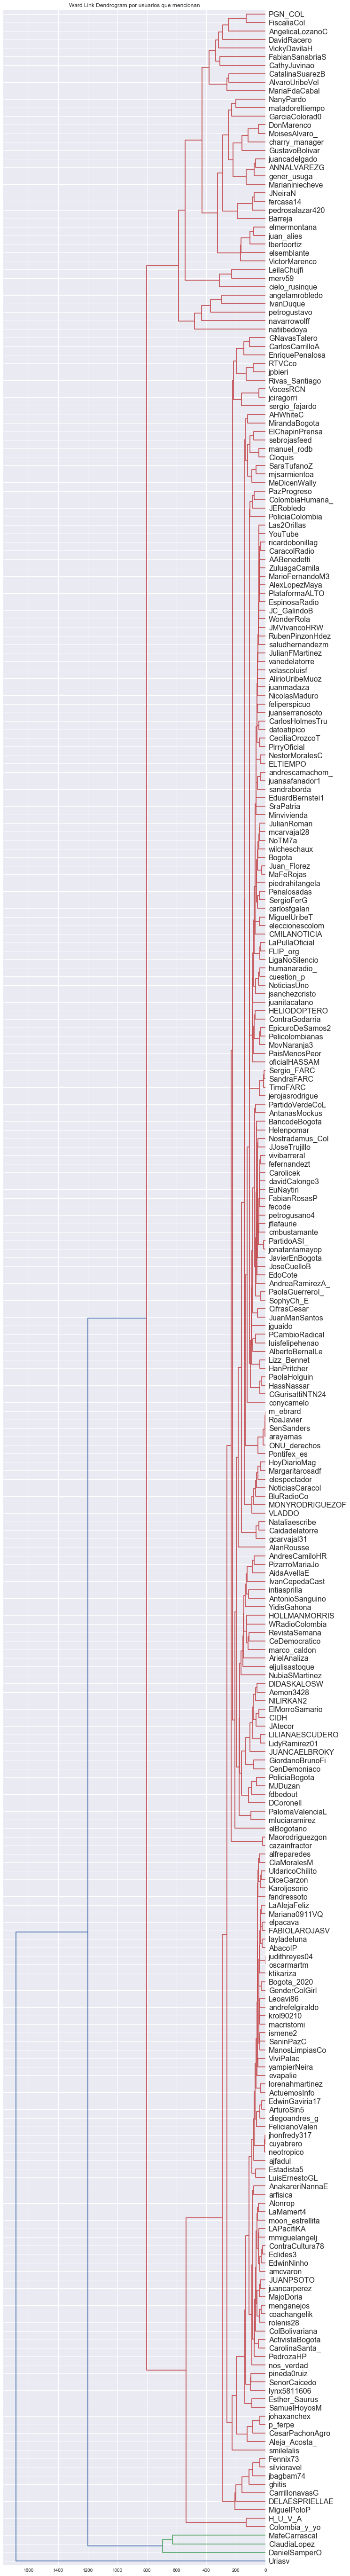

In [26]:
#max_d = 10
plt.figure(figsize=(10,100))
#plt.figure()
dn = hierarchy.dendrogram(mntns_ward_usr,orientation="left", labels=names_mnts_top)
#plt.axhline(y=max_d, c='k')
plt.title('Ward Link Dendrogram por usuarios que mencionan')
plt.yticks(fontsize=16)
# plt.savefig('dendrograma_ward_link_mentions.png')
plt.show()

In [27]:
directed_graph_df.sum(axis=1).sort_values(ascending=False)[:50]#Mayores tuiteros

LeilaChujfi        2384.0
Barreja            1918.0
merv59             1621.0
AnakareriNannaE    1104.0
WILBERGB           1045.0
DonMarenco         1028.0
GLORIDMQ           1023.0
macdonal5           952.0
Angelic11083708     916.0
Fernand82105214     914.0
DukabaEvi           908.0
H_U_V_A             896.0
douglasemolina      865.0
fercasa14           862.0
wilromerol          810.0
WILLJ84753699       795.0
PazProgreso         782.0
ariasen978          760.0
Colombia_y_yo       751.0
maxmaye15354547     735.0
MABG07194938        726.0
LuisEdu620829       721.0
CarrillonavasG      701.0
ernesto1972m6       695.0
PedrozaHP           672.0
LinaLeo73908100     661.0
kalimann56          654.0
AlverniaAbraham     645.0
Helenpomar          635.0
ArielCastill1       629.0
Ramiro6668          628.0
rubenarango2003     622.0
matebetancur        576.0
nancysuarezc        546.0
Enfermedad_DIM      541.0
RafaGarcia60        533.0
LaArboleda4         528.0
Miryam78151448      526.0
HenryQuinter

In [28]:
directed_graph_df.sum(axis=0).sort_values(ascending=False)[:50]#Los más tuiteados

DanielSamperO      48022.0
ClaudiaLopez       43949.0
MafeCarrascal      42420.0
Uriasv             37578.0
petrogustavo       21625.0
natiibedoya        21209.0
navarrowolff       21110.0
IvanDuque          19146.0
angelamrobledo     15323.0
MariaFdaCabal      12177.0
VickyDavilaH       11877.0
CathyJuvinao       11366.0
DavidRacero        10886.0
AngelicaLozanoC    10026.0
matadoreltiempo     9515.0
Rivas_Santiago      8522.0
AlvaroUribeVel      8367.0
DELAESPRIELLAE      8161.0
NanyPardo           7775.0
GarciaColorad0      6030.0
sergio_fajardo      5922.0
CatalinaSuarezB     5637.0
FabianSanabriaS     5191.0
GustavoBolivar      4913.0
cielo_rusinque      4907.0
eljulisastoque      4859.0
elsemblante         4805.0
FiscaliaCol         4715.0
jpbieri             4371.0
EnriquePenalosa     4308.0
ghitis              4302.0
IvanCepedaCast      4228.0
NubiaSMartinez      4210.0
DCoronell           4138.0
ArielAnaliza        4104.0
charry_manager      3876.0
WRadioColombia      3702.0
A

# Temporalidad

In [29]:
tw_fechas_df=pd.DataFrame(np.column_stack([tw_user,tw_date]))
tw_fechas_df.columns=["user","date_tweet"]
tw_fechas_df["date_tweet"]=pd.to_datetime(tw_fechas_df['date_tweet'], utc=True)#.tz_convert('US/Eastern')
tw_fechas_df.set_index('date_tweet', inplace=True)#.tz_convert('US/Eastern')
tw_fechas_df.index=tw_fechas_df.index.tz_convert('US/Eastern')
tw_fechas_df["ocurr"]=1

In [30]:
time_sample="600S"

In [31]:
tot_tw_fechas=tw_fechas_df.ocurr.resample(time_sample).sum()

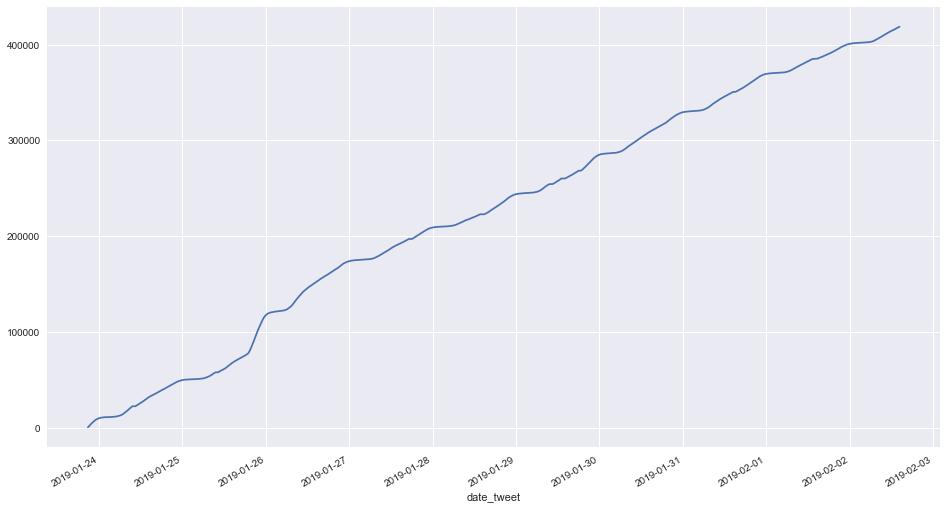

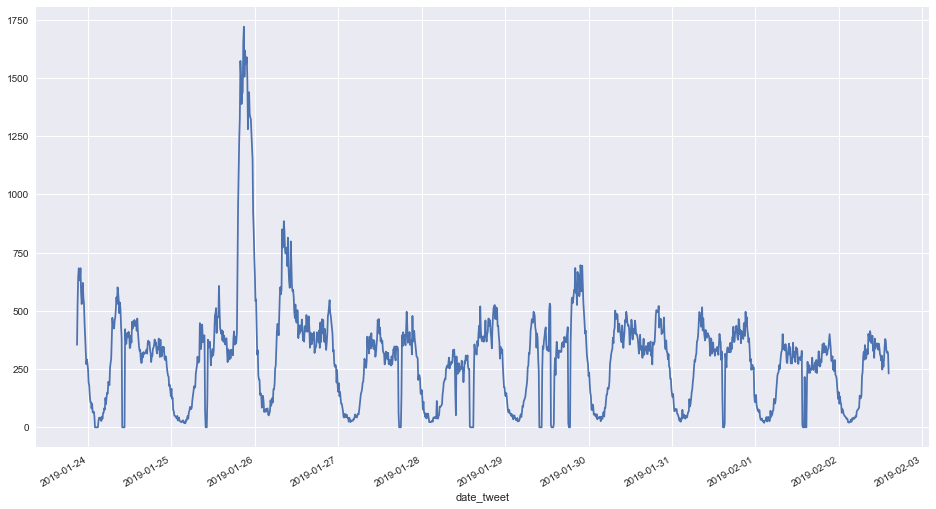

In [32]:
plt.figure(figsize=(16,9))
tot_tw_fechas.cumsum().plot()#kind="bar")
plt.show()

plt.figure(figsize=(16,9))
tot_tw_fechas.plot()#kind="bar")
plt.show()

In [33]:
mayor_tweeters=list(directed_graph_df.sum(axis=1).sort_values(ascending=False).index[:10])

In [34]:
tw_fechas_df_top=tw_fechas_df[tw_fechas_df.user.isin(mayor_tweeters)]
#tw_fechas_df_filt.head(20)

In [35]:
twits_filt=pd.crosstab(index=tw_fechas_df_top.index,
                  columns=tw_fechas_df_top["user"])
twits_filt=twits_filt.resample(time_sample).sum()

user
LeilaChujfi        675
Barreja            560
WILBERGB           547
Fernand82105214    526
AnakareriNannaE    526
Angelic11083708    518
GLORIDMQ           465
merv59             463
macdonal5          222
DonMarenco         177
dtype: int64

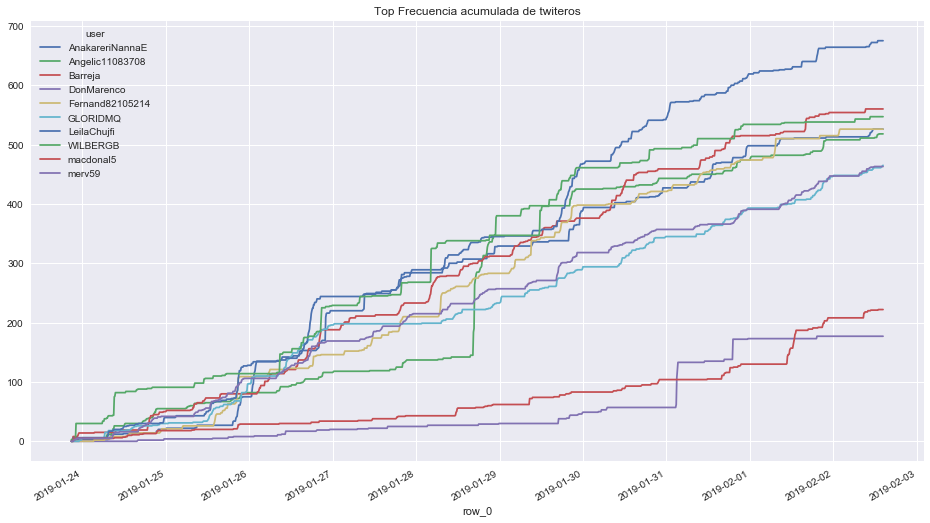

In [36]:
twits_filt.cumsum().plot(figsize=(16,9), title=("Top Frecuencia acumulada de twiteros"))
twits_filt.sum(axis=0).sort_values(ascending=False)[:10]

In [37]:
top_ments_df=df_mntns_top_ocurr.copy()*1
top_ments_df.index=tw_fechas_df.index
# top_ments_df.head(20)

In [38]:
top_ments_df_day=top_ments_df.iloc[:,:10].resample(time_sample).sum()
top_ments_df_day.sum(axis=0)

DanielSamperO     48022
ClaudiaLopez      43949
MafeCarrascal     42420
Uriasv            37578
petrogustavo      21625
natiibedoya       21209
navarrowolff      21110
IvanDuque         19146
angelamrobledo    15323
MariaFdaCabal     12177
dtype: int64

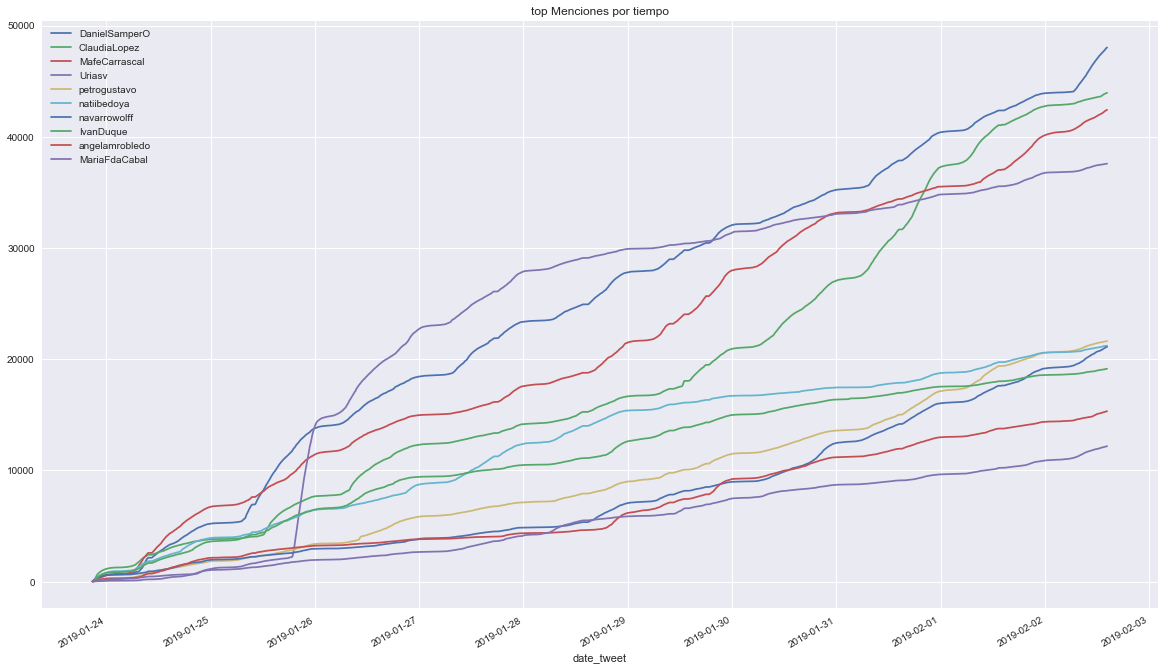

In [39]:
top_ments_df_day.cumsum().plot(figsize=(20,12), title="top Menciones por tiempo")
# (tot_tw_fechas.cumsum()*max(top_ments_df_day.sum(axis=0))/max(tot_tw_fechas.cumsum())).plot(color="black", linestyle='dashed')#kind="bar")

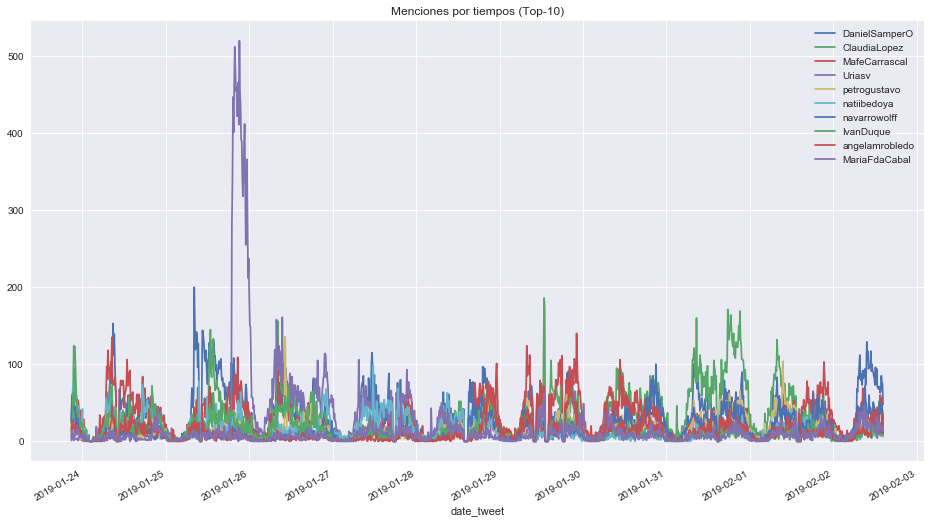

In [40]:
top_ments_df_day.plot(figsize=(16,9), title="Menciones por tiempos (Top-10)")

# Grafos

In [73]:
mat_size=30
graph_mat=directed_graph_df.loc[directed_graph_df.sum(axis=1).sort_values(ascending=False).index[:mat_size],
                                directed_graph_df.sum(axis=0).sort_values(ascending=False).index[:mat_size]
                               ]
graph_mat.head()

,DanielSamperO,ClaudiaLopez,MafeCarrascal,Uriasv,petrogustavo,natiibedoya,navarrowolff,IvanDuque,angelamrobledo,MariaFdaCabal,...,sergio_fajardo,CatalinaSuarezB,FabianSanabriaS,GustavoBolivar,cielo_rusinque,eljulisastoque,elsemblante,FiscaliaCol,jpbieri,EnriquePenalosa
LeilaChujfi,52.0,7.0,50.0,66.0,83.0,9.0,11.0,13.0,14.0,0.0,...,2.0,3.0,26.0,76.0,266.0,4.0,30.0,9.0,0.0,1.0
Barreja,33.0,17.0,30.0,85.0,55.0,7.0,4.0,18.0,13.0,5.0,...,15.0,2.0,63.0,16.0,198.0,16.0,26.0,15.0,4.0,1.0
merv59,20.0,10.0,32.0,43.0,44.0,2.0,4.0,27.0,19.0,4.0,...,2.0,2.0,10.0,34.0,71.0,6.0,38.0,6.0,1.0,0.0
AnakareriNannaE,22.0,12.0,14.0,164.0,25.0,6.0,7.0,25.0,55.0,5.0,...,3.0,8.0,26.0,29.0,6.0,6.0,16.0,1.0,1.0,2.0
WILBERGB,93.0,23.0,116.0,23.0,22.0,79.0,5.0,10.0,4.0,44.0,...,10.0,40.0,0.0,13.0,4.0,13.0,0.0,32.0,0.0,4.0


In [74]:
graph_df=graph_mat.melt()
graph_df.columns=["tw_para", "freq"]
graph_df["tw_de"]=[usr for i in range(int(len(graph_df)/len(graph_mat.index)))for usr in list(graph_mat.index)]
graph_df=graph_df.loc[:,["tw_de","tw_para","freq"]]

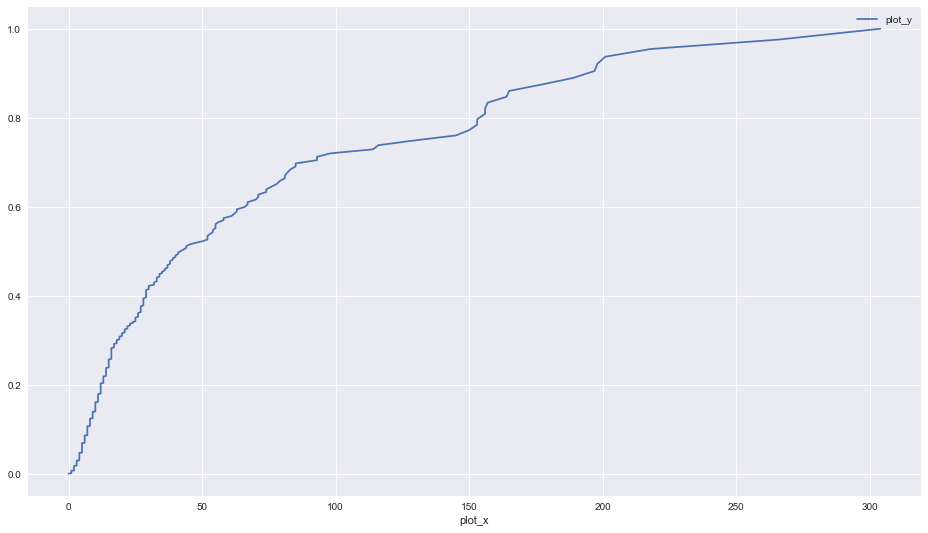

In [75]:
plot_x=np.array(list(graph_df.freq.sort_values(ascending=True)))
plot_y=np.cumsum(plot_x)/sum(plot_x)
cum_freq=pd.DataFrame({"plot_x":plot_x,
                       "plot_y":plot_y})
cum_freq.plot(x="plot_x",
              y="plot_y",
             figsize=(16,9))

In [76]:
min_crit_tw=cum_freq[cum_freq.plot_y>=.4].iloc[0,0]
graph_df_filt=graph_df.loc[graph_df.freq>=min_crit_tw,:]
mx_fr=max(graph_df_filt.freq)
print(min_crit_tw)
print(len(graph_df_filt))
graph_df_filt.sort_values("freq",ascending=False)#.head(20)

29.0
101


,tw_de,tw_para,freq
100,DukabaEvi,Uriasv,304.0
720,LeilaChujfi,cielo_rusinque,266.0
105,WILLJ84753699,Uriasv,218.0
110,MABG07194938,Uriasv,201.0
721,Barreja,cielo_rusinque,198.0
114,PedrozaHP,Uriasv,197.0
102,douglasemolina,Uriasv,189.0
668,Angelic11083708,FabianSanabriaS,177.0
103,fercasa14,Uriasv,165.0
93,AnakareriNannaE,Uriasv,164.0


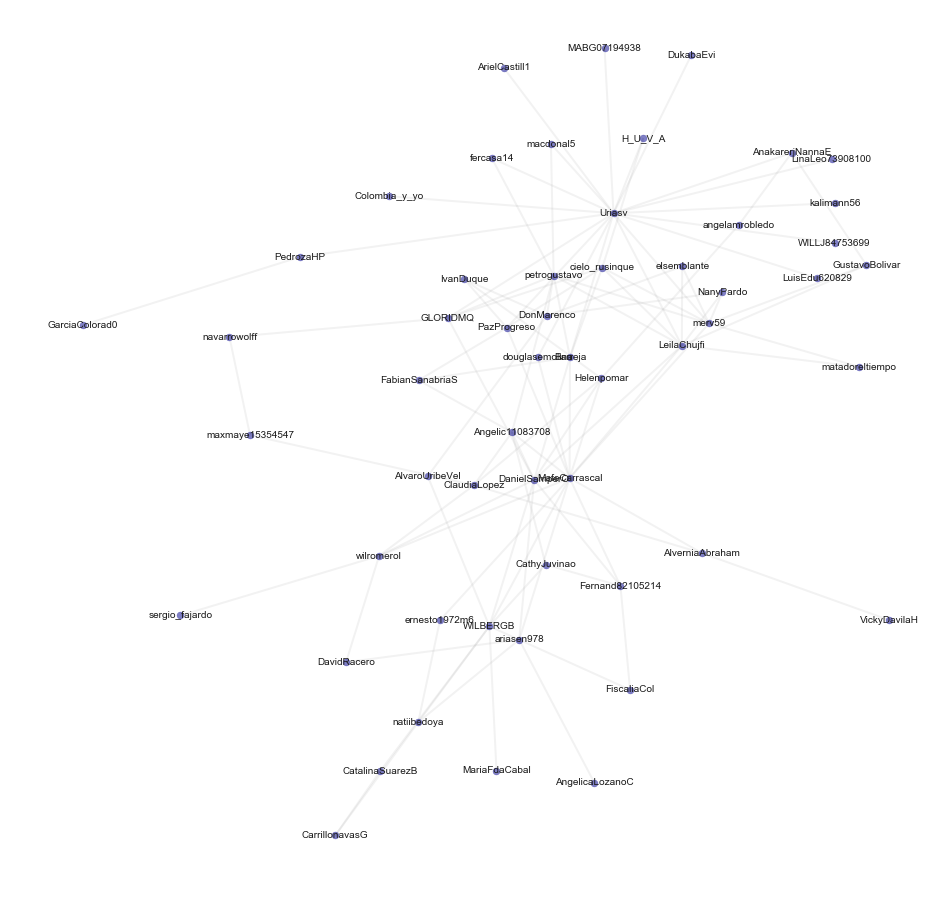

In [77]:
G_2= nx.Graph()#nx.generators.directed.random_k_out_graph(10, 3, 0.5)
for i, elrow in graph_df_filt.iterrows():
    G_2.add_edge(elrow[0], elrow[1])

pos_2 = nx.layout.spring_layout(G_2)

plt.figure(figsize=(16,16))
edges = nx.draw_networkx_edges(G_2, pos_2, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_2, pos_2, node_size=50, node_color='darkblue', alpha=.5)
labels = nx.draw_networkx_labels(G_2, pos_2, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()

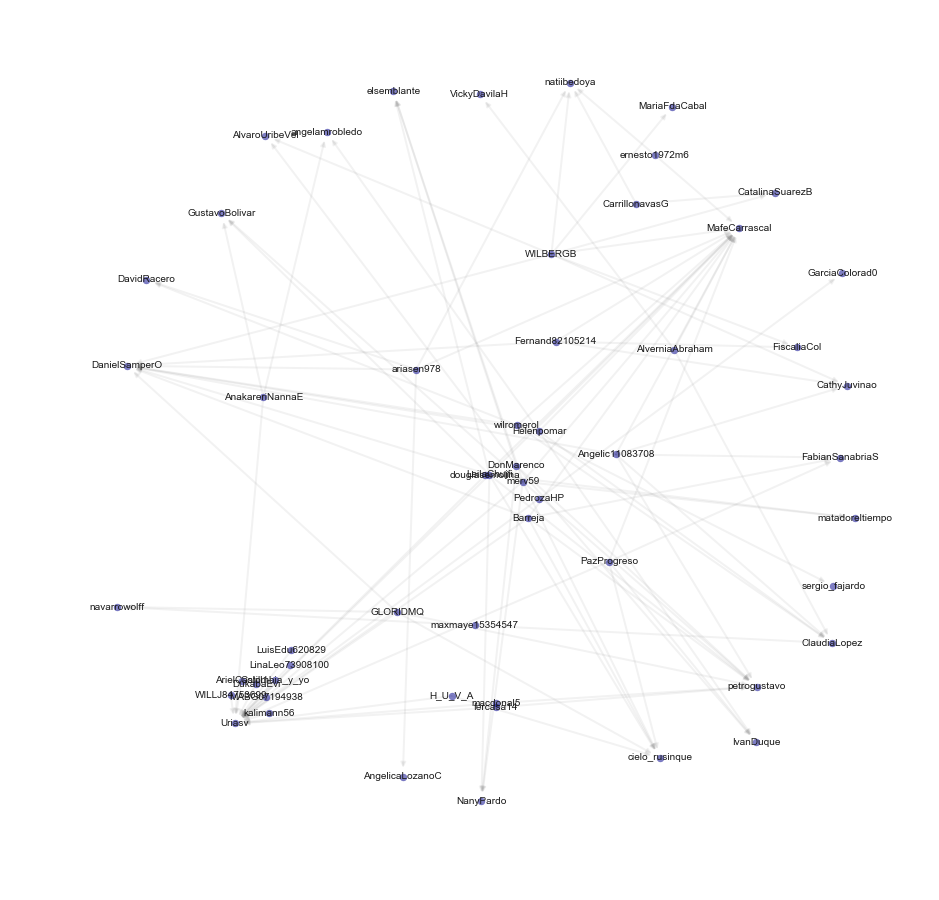

In [78]:
plt.figure(figsize=(16,16))
G_1= nx.DiGraph()
for i, elrow in graph_df_filt.iterrows():
    G_1.add_edge(elrow[0], elrow[1])

pos_1 = nx.layout.spring_layout(G_1)

edges = nx.draw_networkx_edges(G_1, pos_1, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_1, pos_1, node_size=50, node_color='darkblue', alpha=.5)
labels = nx.draw_networkx_labels(G_1, pos_1, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()

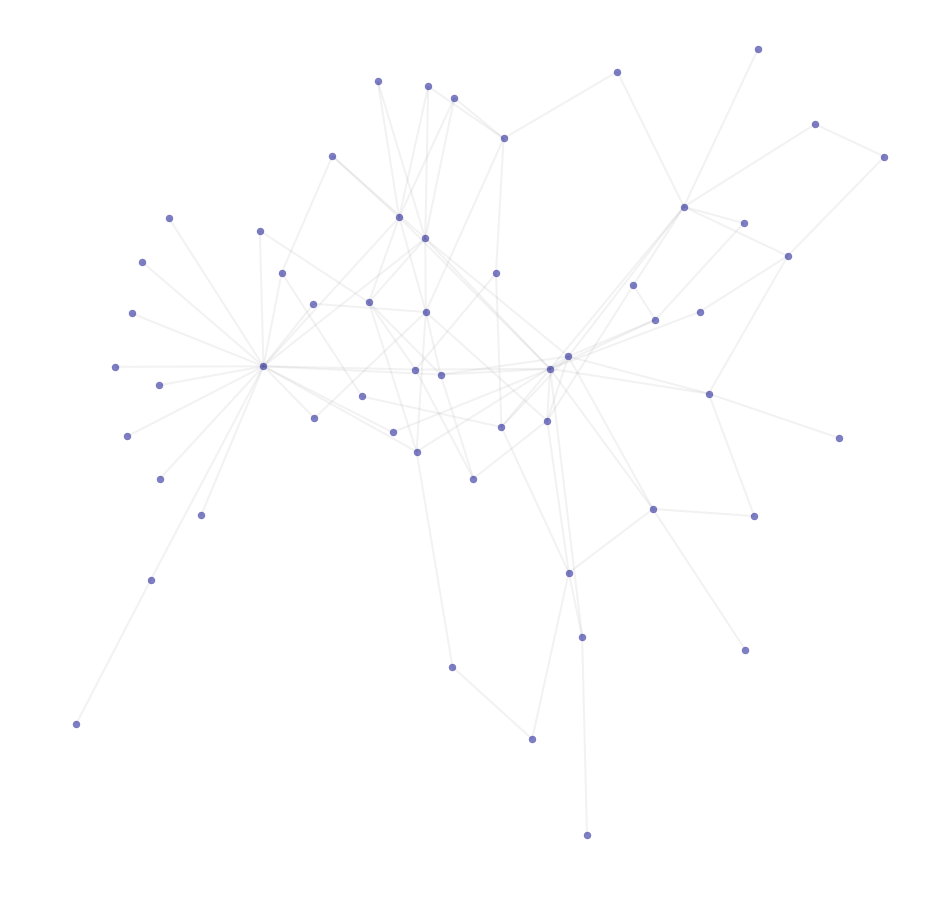

In [79]:
plt.figure(figsize=(16,16))
G_3= nx.Graph()
for i, elrow in graph_df_filt.iterrows():
    G_3.add_edge(elrow[0], elrow[1])

pos_3 = nx.layout.spring_layout(G_3)

edges = nx.draw_networkx_edges(G_3, pos_3, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_3, pos_3, node_size=50, node_color='darkblue', alpha=.5)
# labels = nx.draw_networkx_labels(G_3, pos_3, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()